In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Task 1: Load and Inspect the Data

In [4]:
df = pd.read_csv(r'C:\Users\priya\Desktop\Python_training\Hackathon5\heart.txt')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [6]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


Checking s=distribution of target

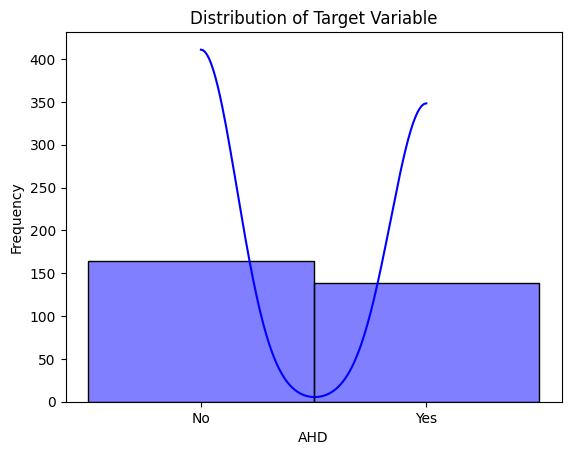

In [11]:
sns.histplot(df['AHD'], kde=True, color='blue')
plt.title('Distribution of Target Variable')
plt.xlabel('AHD')
plt.ylabel('Frequency')
plt.show()


Task 2: Data Cleaning and Preprocessing 

In [14]:
#Handle missing data

# Check for missing values in each column
missing_data = df.isnull().sum()
print(missing_data)

df['Ca'].fillna(df['Ca'].median(), inplace=True)
(df.isnull().sum())
 
df['Thal'].fillna(df['Thal'].mode()[0], inplace=True)
(df.isnull().sum())


Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


C:\Users\priya\AppData\Local\Temp\ipykernel_16940\52672066.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ca'].fillna(df['Ca'].median(), inplace=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_16940\52672066.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

Feature Engineering: 
convert categorical variables like Sex, ChestPainType, RestingECG, etc., into numeric format using encoding (e.g., one-hot encoding or label encoding).

In [15]:
# Use one-hot encoding for categorical columns
data_encoded = pd.get_dummies(df, columns=["Age","Sex","ChestPain","RestBP","Chol","Fbs","RestECG","MaxHR","ExAng","Oldpeak","Slope","Ca","Thal","AHD",], drop_first=True)
print(data_encoded.head())


   Unnamed: 0  Age_34  Age_35  Age_37  Age_38  Age_39  Age_40  Age_41  Age_42  \
0           1   False   False   False   False   False   False   False   False   
1           2   False   False   False   False   False   False   False   False   
2           3   False   False   False   False   False   False   False   False   
3           4   False   False    True   False   False   False   False   False   
4           5   False   False   False   False   False   False    True   False   

   Age_43  ...  Oldpeak_5.6  Oldpeak_6.2  Slope_2  Slope_3  Ca_1.0  Ca_2.0  \
0   False  ...        False        False    False     True   False   False   
1   False  ...        False        False     True    False   False   False   
2   False  ...        False        False     True    False   False    True   
3   False  ...        False        False    False     True   False   False   
4   False  ...        False        False    False    False   False   False   

   Ca_3.0  Thal_normal  Thal_reversable  AHD

Normalize or standardize numerical columns if necessary (e.g., RestingBP, Cholesterol, MaxHR)

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Columns to scale
numerical_cols = ["Age","Sex","RestBP","Chol","Fbs","RestECG","MaxHR","ExAng","Oldpeak","Slope","Ca",]

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df[numerical_cols].head())


        Age       Sex    RestBP      Chol       Fbs   RestECG     MaxHR  \
0  0.948726  0.686202  0.757525 -0.264900  2.394438  1.016684  0.017197   
1  1.392002  0.686202  1.611220  0.760415 -0.417635  1.016684 -1.821905   
2  1.392002  0.686202 -0.665300 -0.342283 -0.417635  1.016684 -0.902354   
3 -1.932564  0.686202 -0.096170  0.063974 -0.417635 -0.996749  1.637359   
4 -1.489288 -1.457296 -0.096170 -0.825922 -0.417635  1.016684  0.980537   

      ExAng   Oldpeak     Slope        Ca  
0 -0.696631  1.087338  2.274579 -0.711131  
1  1.435481  0.397182  0.649113  2.504881  
2  1.435481  1.346147  0.649113  1.432877  
3 -0.696631  2.122573  2.274579 -0.711131  
4 -0.696631  0.310912 -0.976352 -0.711131  


Create New Features: 
 Example: Combine Oldpeak and Slope to create a new feature that 
represents "exercise-induced heart stres

In [19]:
# Create a new feature called 'ExerciseStress'
df['ExerciseStress'] = df['Oldpeak'] * df['Slope']

# Display the first few rows to check the new feature
print(df[['Oldpeak', 'Slope', 'ExerciseStress']].head())


    Oldpeak     Slope  ExerciseStress
0  1.087338  2.274579        2.473236
1  0.397182  0.649113        0.257816
2  1.346147  0.649113        0.873802
3  2.122573  2.274579        4.827959
4  0.310912 -0.976352       -0.303560


TASK 3 Exploratory Data Analysis (EDA) 

Univariate Analysis: 
 Plot the distribution of key numerical features (e.g., Age, Cholesterol, 
MaxHR) using histograms or boxplots

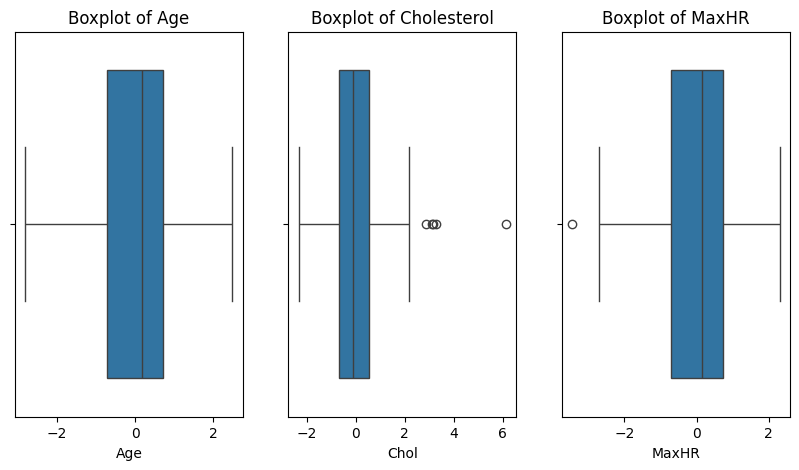

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
sns.boxplot(x=df['Age'], ax=axes[0])
axes[0].set_title('Boxplot of Age')
sns.boxplot(x=df['Chol'], ax=axes[1])
axes[1].set_title('Boxplot of Cholesterol')
sns.boxplot(x=df['MaxHR'], ax=axes[2])
axes[2].set_title('Boxplot of MaxHR')
plt.show()

Visualize the distribution of the target variable (Target), using a count plot.

C:\Users\priya\AppData\Local\Temp\ipykernel_16940\3840611612.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AHD', data=df, palette='pink')


Text(0, 0.5, 'Count')

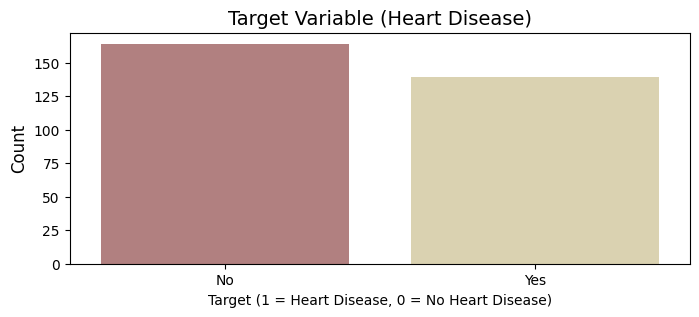

In [23]:
plt.figure(figsize=(8, 3))
sns.countplot(x='AHD', data=df, palette='pink')
plt.title('Target Variable (Heart Disease)', fontsize=14)
plt.xlabel('Target (1 = Heart Disease, 0 = No Heart Disease)')
plt.ylabel('Count', fontsize=12)

Bivariate Analysis: 
  Explore the relationship between the target variable (Target) and other 
features: 


use a count plot or bar plot for categorical features like Sex, 
ChestPainType, FBS, ExerciseAngina.

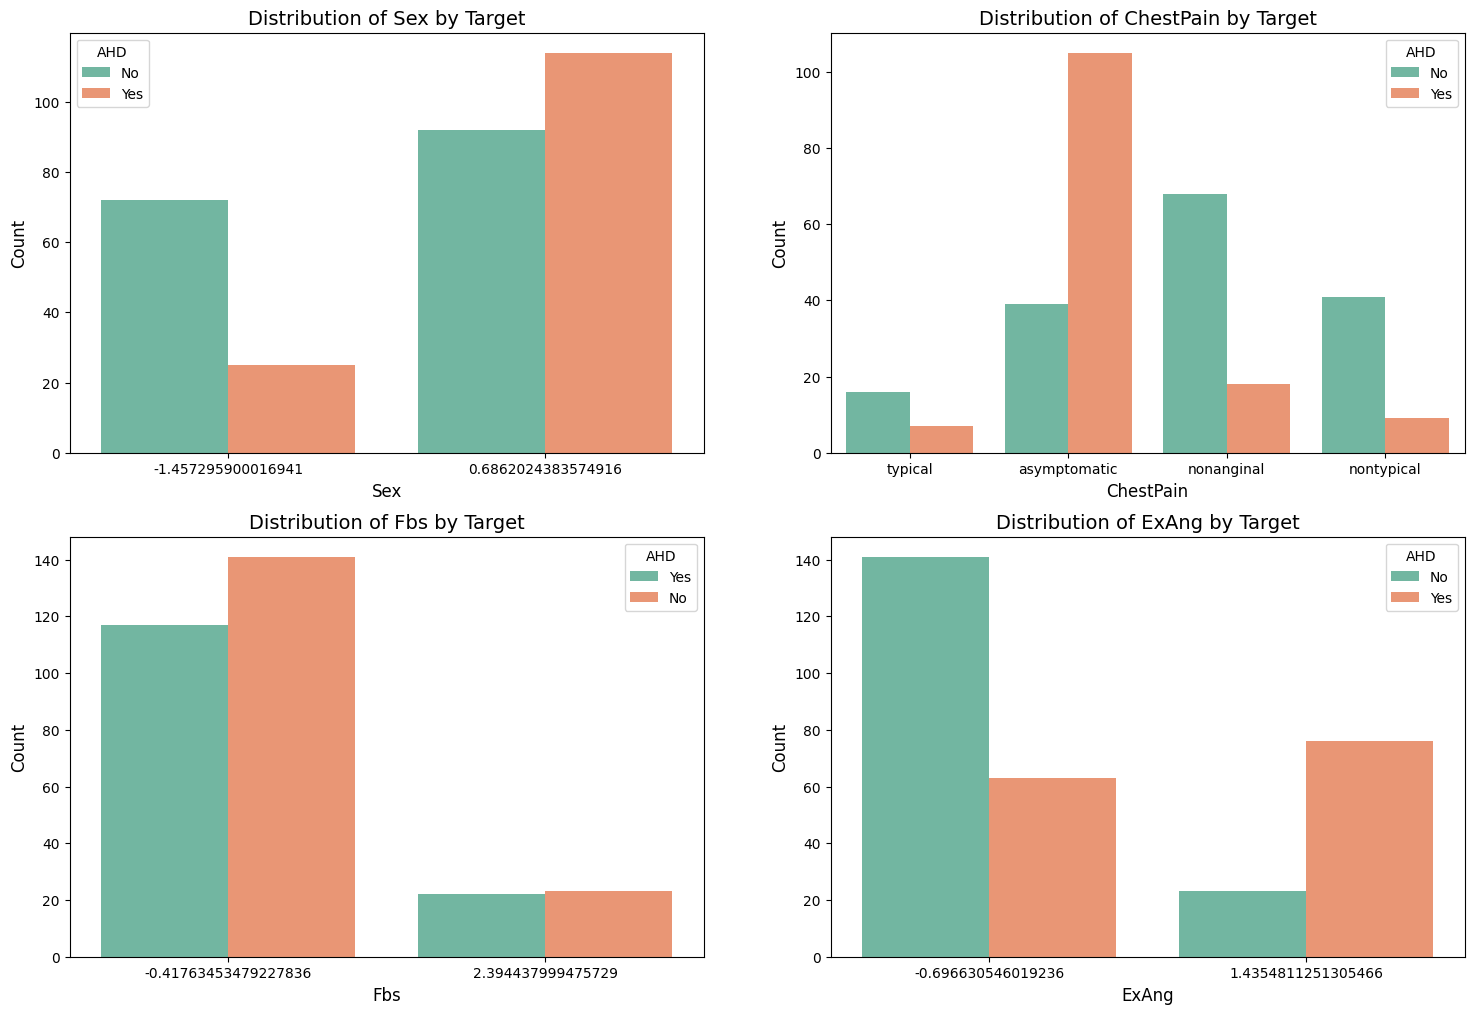

In [31]:
categorical_features = ['Sex', 'ChestPain', 'Fbs', 'ExAng']
plt.figure(figsize=(18, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)  
    sns.countplot(x=feature, hue='AHD', data=df, palette='Set2')
    plt.title(f'Distribution of {feature} by Target', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)

Correlation matrix to explore relationships between numeric 
features. 

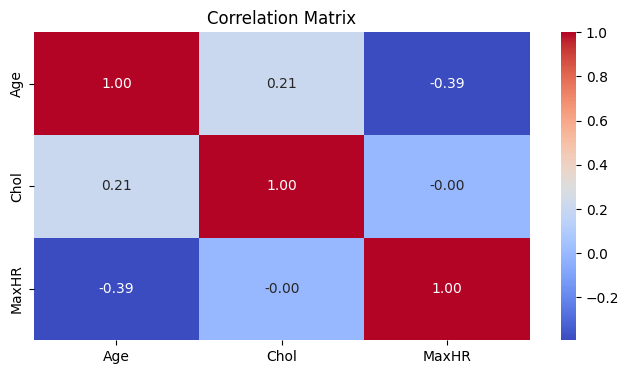

In [5]:
correlation_matrix = df[['Age', 'Chol', 'MaxHR']].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Visualize correlations using a heatmap (sns.heatmap), focusing on 
relationships between features like cholesterol, age, and resting blood 
pressure. 

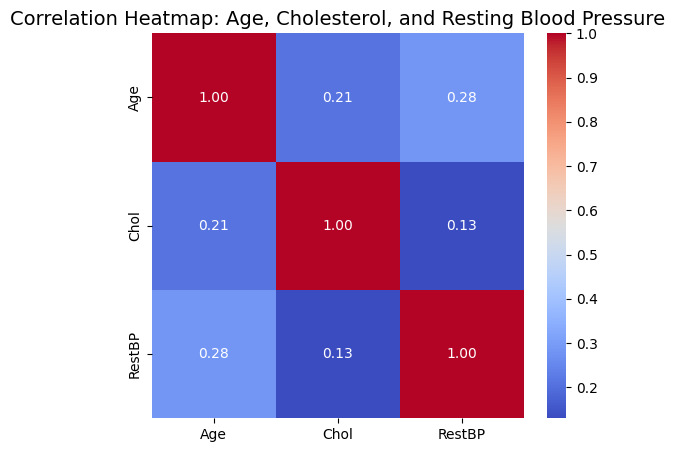

In [6]:
 
correlation_matrix = df[['Age', 'Chol', 'RestBP']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Age, Cholesterol, and Resting Blood Pressure', fontsize=14)
plt.show()
 

TASK 4: Aggregation and Insights 

Use groupby to find the survival rate (presence of heart disease) by diƯerent 
categories: 
o  Survival by gender (Male vs Female). 

In [10]:

survival_by_gender = df.groupby('Sex')['AHD'].apply(lambda x: (x == 'Yes').mean())

print("Survival Rate by Gender:")
print(survival_by_gender)


Survival Rate by Gender:
Sex
0    0.257732
1    0.553398
Name: AHD, dtype: float64


Survival by chest pain type (ChestPainType). 

In [11]:
survival_by_chest_pain = df.groupby('ChestPain')['AHD'].apply(lambda x: (x == 'Yes').mean())

print("\nSurvival Rate by Chest Pain Type:")
print(survival_by_chest_pain)



Survival Rate by Chest Pain Type:
ChestPain
asymptomatic    0.729167
nonanginal      0.209302
nontypical      0.180000
typical         0.304348
Name: AHD, dtype: float64


Survival by maximum heart rate achieved (MaxHR). 

In [13]:
survival_by_max_heartrate = df.groupby('ChestPain')['AHD'].max()
survival_by_max_heartrate.value_counts

<bound method IndexOpsMixin.value_counts of ChestPain
asymptomatic    Yes
nonanginal      Yes
nontypical      Yes
typical         Yes
Name: AHD, dtype: object>

Calculate average cholesterol levels for people with and without heart disease, 
and compare these across categories (e.g., ChestPainType). 

Average Cholesterol Levels:
AHD                   No         Yes
ChestPain                           
asymptomatic  245.333333  252.438095
nonanginal    245.279412  239.000000
nontypical    240.682927  263.444444
typical       229.875000  253.714286


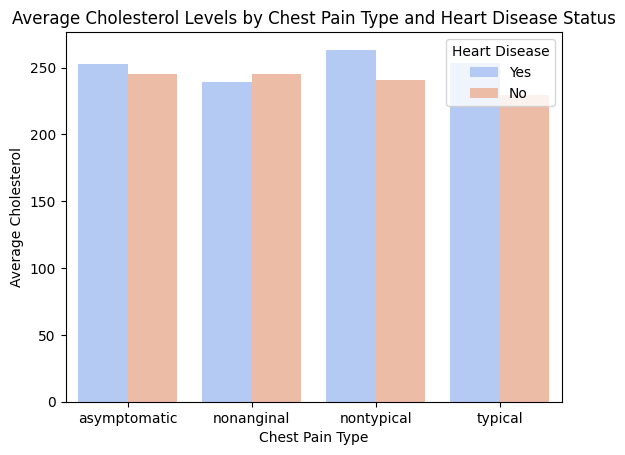

In [ ]:
avg_cholesterol = df.groupby(['ChestPain', 'AHD'])['Chol'].mean().unstack()

print("Average Cholesterol Levels:")
print(avg_cholesterol)

avg_cholesterol_plot = avg_cholesterol.reset_index()


avg_cholesterol_plot = avg_cholesterol_plot.melt(id_vars='ChestPain', value_vars=['Yes', 'No'], var_name='HeartDisease', value_name='AvgCholesterol')

sns.barplot(data=avg_cholesterol_plot, x='ChestPain', y='AvgCholesterol', hue='HeartDisease', palette='coolwarm')
plt.title('Average Cholesterol Levels by Chest Pain Type and Heart Disease Status')
plt.xlabel('Chest Pain Type')
plt.ylabel('Average Cholesterol')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()


TASK 5  Derive Medical Insights 
  Investigate the data set and come up with at least 5 diƯerent insights with proof 


In [16]:
survival_by_gender = df.groupby('Sex')['AHD'].apply(lambda x: (x == 'Yes').mean())
print(survival_by_gender)
survival_by_chest_pain = df.groupby('ChestPain')['AHD'].apply(lambda x: (x == 'Yes').mean())
print(survival_by_chest_pain)
avg_cholesterol = df.groupby('AHD')['Chol'].mean()
print(avg_cholesterol)
bins = [0, 100, 140, 180, float('inf')]
labels = ['<100', '100-140', '140-180', '>180']
df['HR_Range'] = pd.cut(df['MaxHR'], bins=bins, labels=labels)
survival_by_hr = df.groupby('HR_Range')['AHD'].apply(lambda x: (x == 'Yes').mean())
print(survival_by_hr)
survival_by_exang = df.groupby('ExAng')['AHD'].apply(lambda x: (x == 'Yes').mean())
print(survival_by_exang)


Sex
0    0.257732
1    0.553398
Name: AHD, dtype: float64
ChestPain
asymptomatic    0.729167
nonanginal      0.209302
nontypical      0.180000
typical         0.304348
Name: AHD, dtype: float64
AHD
No     242.640244
Yes    251.474820
Name: Chol, dtype: float64
HR_Range
<100       0.875000
100-140    0.698795
140-180    0.365979
>180       0.166667
Name: AHD, dtype: float64
ExAng
0    0.308824
1    0.767677
Name: AHD, dtype: float64


C:\Users\priya\AppData\Local\Temp\ipykernel_2152\3814863721.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_hr = df.groupby('HR_Range')['AHD'].apply(lambda x: (x == 'Yes').mean())


Prepare a dashboard for your findings

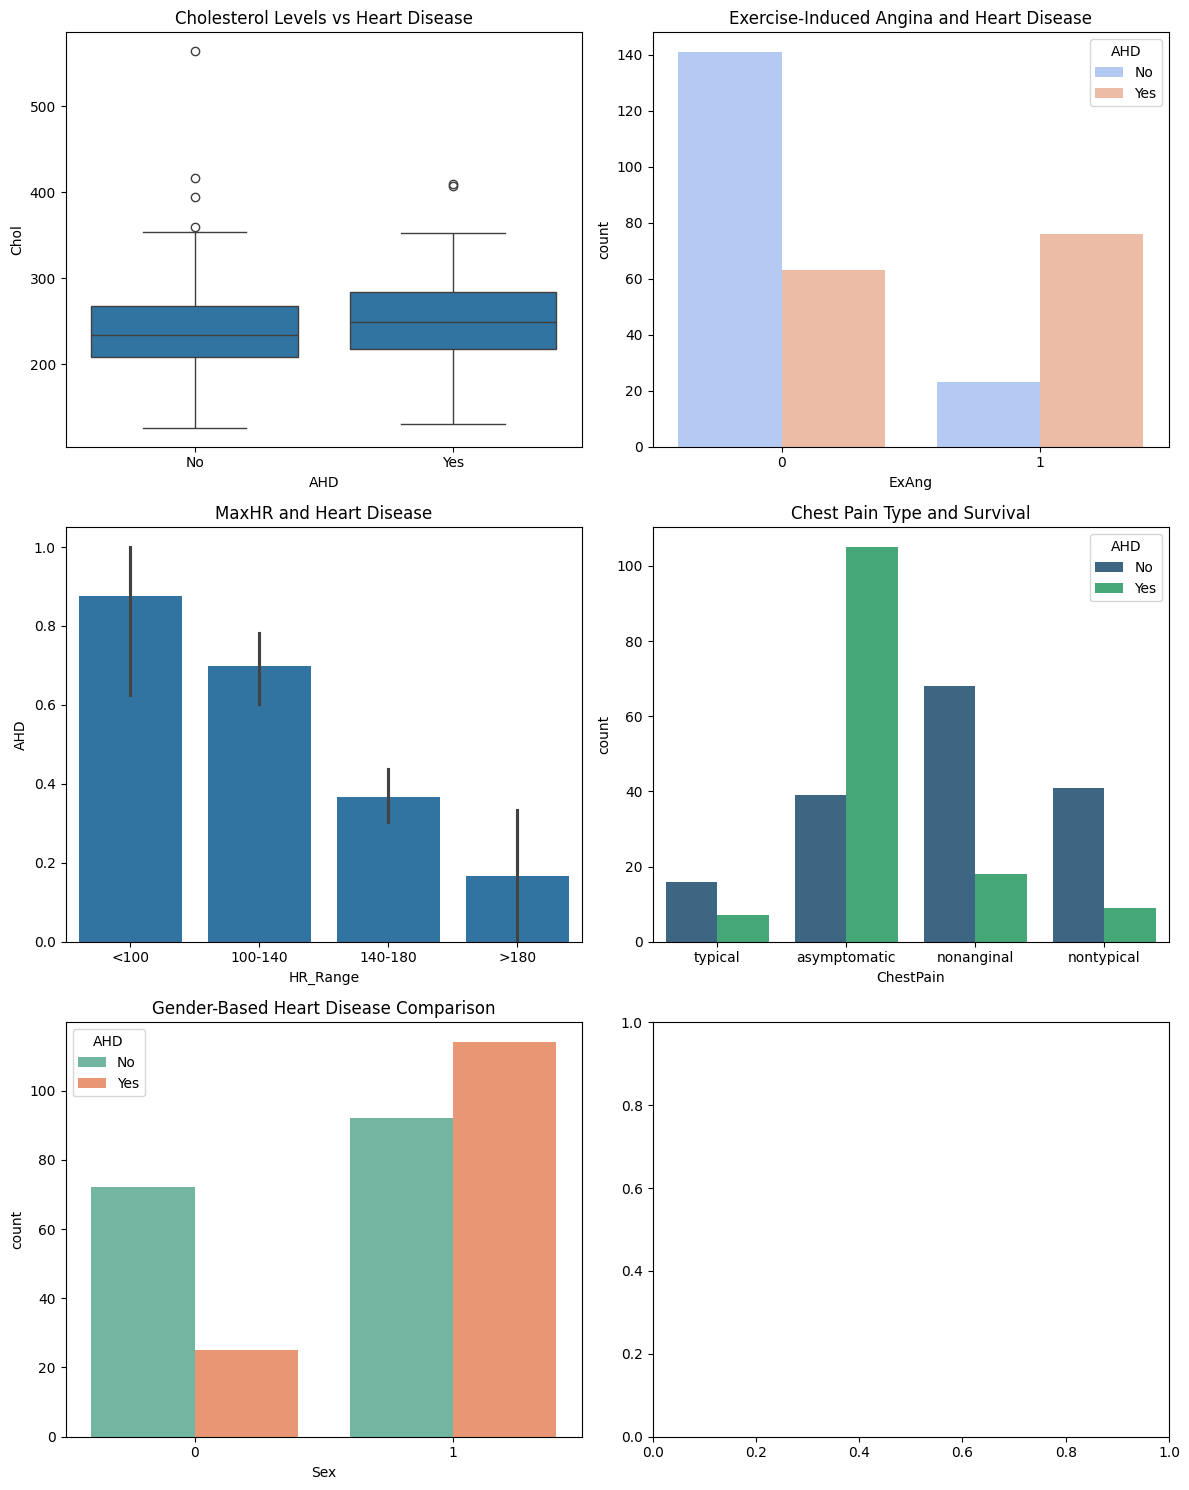

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))  # Adjust rows and columns as needed


sns.boxplot(data=df, x='AHD', y='Chol', ax=axes[0, 0])
axes[0, 0].set_title('Cholesterol Levels vs Heart Disease')


sns.countplot(data=df, x='ExAng', hue='AHD', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Exercise-Induced Angina and Heart Disease')


bins = [0, 100, 140, 180, float('inf')]
labels = ['<100', '100-140', '140-180', '>180']
df['HR_Range'] = pd.cut(df['MaxHR'], bins=bins, labels=labels)
sns.barplot(data=df, x='HR_Range', y=df['AHD'].apply(lambda x: 1 if x == 'Yes' else 0), ax=axes[1, 0])
axes[1, 0].set_title('MaxHR and Heart Disease')


sns.countplot(data=df, x='ChestPain', hue='AHD', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Chest Pain Type and Survival')

sns.countplot(data=df, x='Sex', hue='AHD', ax=axes[2, 0], palette='Set2')
axes[2, 0].set_title('Gender-Based Heart Disease Comparison')

plt.tight_layout()
plt.show()
